<h1>Prediciting the Results of a LoL Games Using the first 10 min of a game</h1>

<h3>Jiadi Huang</h3>

League of Legends (LoL) is a multiplayer online battle arena video game developed and published by Riot Games .It is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. In League of Legends, players assume the role of a "champion" with unique abilities and battle against a team of other player- or computer-controlled champions. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

The problem I will be analyzing is what affects the win condition of each game.

I will be building models to predict the results of games

Link to data: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min#high_diamond_ranked_10min.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
X=df.drop(['gameId', 'blueWins'], axis=1)
Y=df['blueWins']

<h3>Creating a correlation map to drop some unnecessary prediction variables</h3>

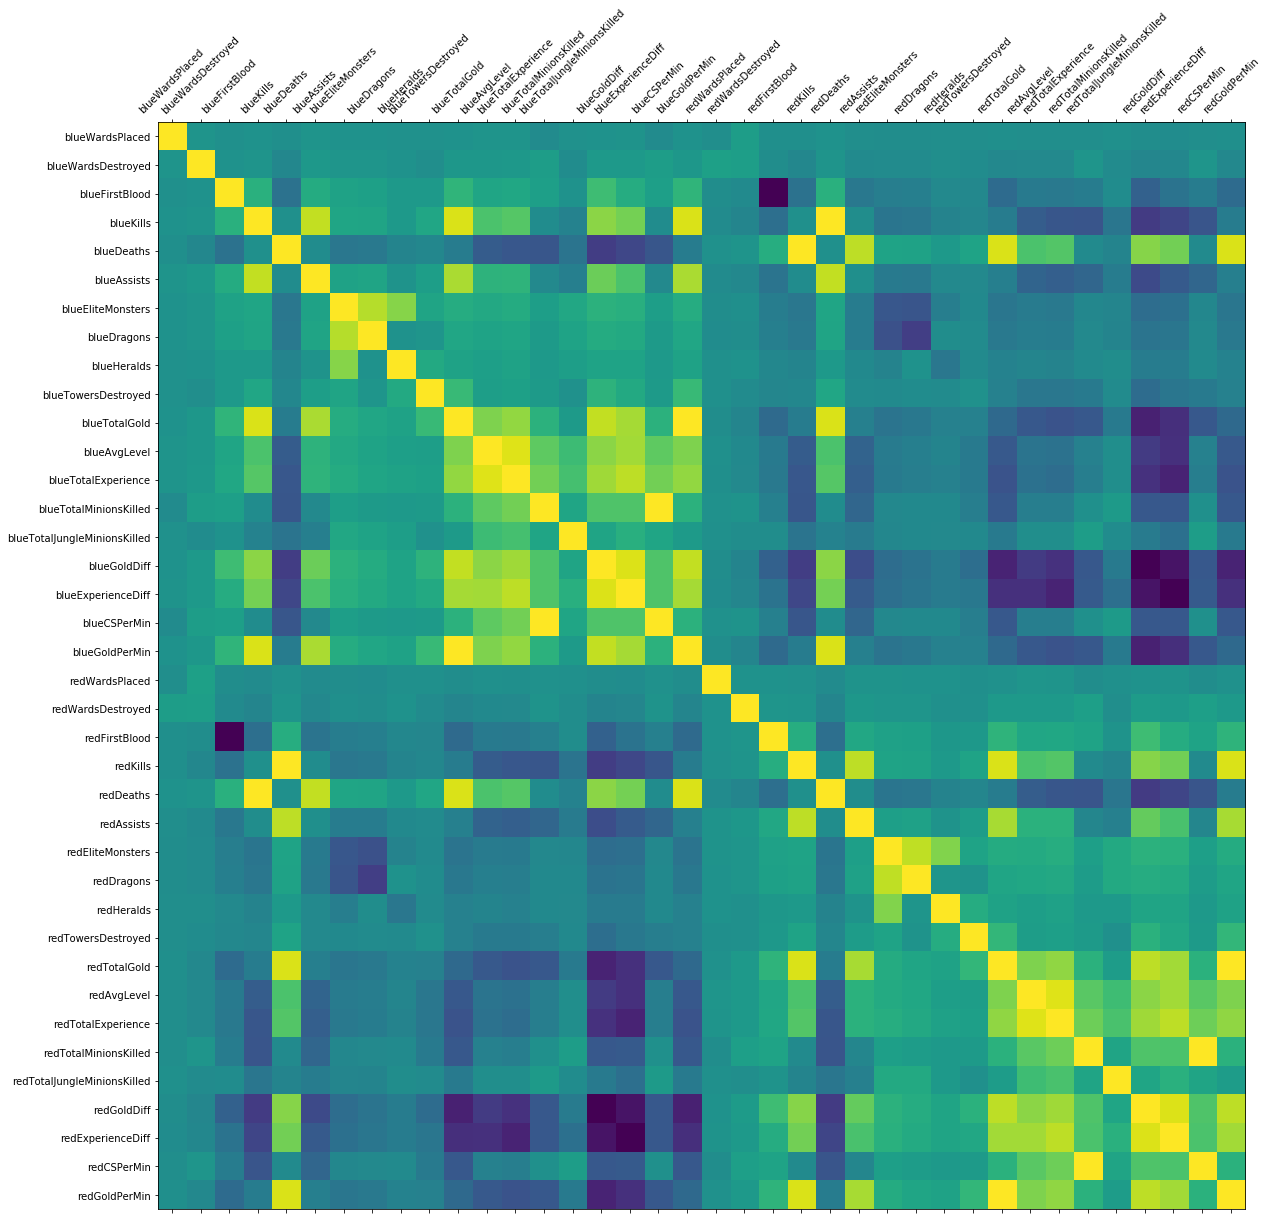

In [4]:
corr = X.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(corr)

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

fig.set_size_inches(20, 20)
plt.show()

<h3>From the above graph, we can see that some variables are highly correlated and we want to drop some of the variables because they are too correlated</h3>

In [5]:
df = df.drop(['redFirstBlood', 'redKills', 'redTotalExperience', 'blueTotalExperience'],axis = 1)
df = df.drop(['redGoldDiff', 'blueGoldDiff', 'redExperienceDiff', 'blueExperienceDiff'],axis = 1)
df = df.drop(['redCSPerMin', 'blueCSPerMin', 'redGoldPerMin', 'blueGoldPerMin'],axis = 1)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,4519157822,0,28,2,1,9,6,11,0,0,...,9,8,0,0,0,0,16567,6.8,197,55
1,4523371949,0,12,1,0,5,5,5,0,0,...,5,2,2,1,1,1,17620,6.8,240,52
2,4521474530,0,15,0,0,7,11,4,1,1,...,7,14,0,0,0,0,17285,6.8,203,28
3,4524384067,0,43,1,0,4,5,5,1,0,...,4,10,0,0,0,0,16478,7.0,235,47
4,4436033771,0,75,4,0,6,6,6,0,0,...,6,7,1,1,0,0,17404,7.0,225,67


In [6]:
X=df.drop(['gameId', 'blueWins'], axis=1)
Y=df['blueWins']

<h3>I am using a logistic model here because winning or losing a game can be thought as a probability</h3>

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
modellog = LogisticRegression()
modellog.fit(X_train, Y_train)

pred_train = modellog.predict(X_train)
pred_test = modellog.predict(X_test)

print("Test Accuracy: ", accuracy_score(Y_test, pred_test))
print("Training Accuracy: ", accuracy_score(Y_train, pred_train))

Test Accuracy:  0.7338056680161943
Training Accuracy:  0.730102492724282


<h3>Coefficients for the Logisitic Model</h3>

In [8]:
modellog.coef_

array([[-0.0022208 ,  0.0079946 , -0.01663982,  0.02640235, -0.04261053,
        -0.02267479,  0.12387986,  0.13675059, -0.01287073, -0.01528118,
         0.00050401,  0.02498708, -0.00035848,  0.01172819, -0.0028788 ,
        -0.00399246,  0.02640235,  0.02503179, -0.12178281, -0.13489322,
         0.0131104 ,  0.02083356, -0.00052307, -0.03712525,  0.00015586,
        -0.00216235]])

<h3>Using a KNN model here to categorize a winning game vs. a losing game</h3>

In [9]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, Y_train)

pred_train = modelKNN.predict(X_train)
pred_test = modelKNN.predict(X_test)

print("Test Accuracy: ", accuracy_score(Y_test, pred_test))
print("Training Accuracy: ", accuracy_score(Y_train, pred_train))

Test Accuracy:  0.6958502024291497
Training Accuracy:  0.7760344173098823


<h3>The two models used are good fit to the data givevn the high test accuracy and training accuracy scores</h3>